In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score, roc_auc_score
import seaborn as sns
from xgboost import plot_importance
%matplotlib inline

In [4]:
df = pd.read_csv("../input/india-ml-hiring-av/train.csv")

In [5]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [7]:
df.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


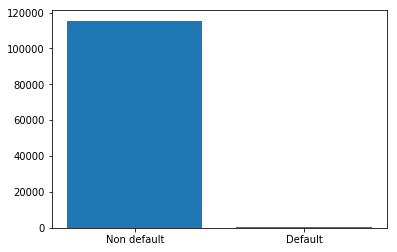

In [8]:
positive = df[df['m13'] == 0]
non_default = positive.shape[0]
negative = df[df['m13'] == 1]
default = negative.shape[0]
plt.bar(['Non default', 'Default'], [non_default, default])
plt.show()

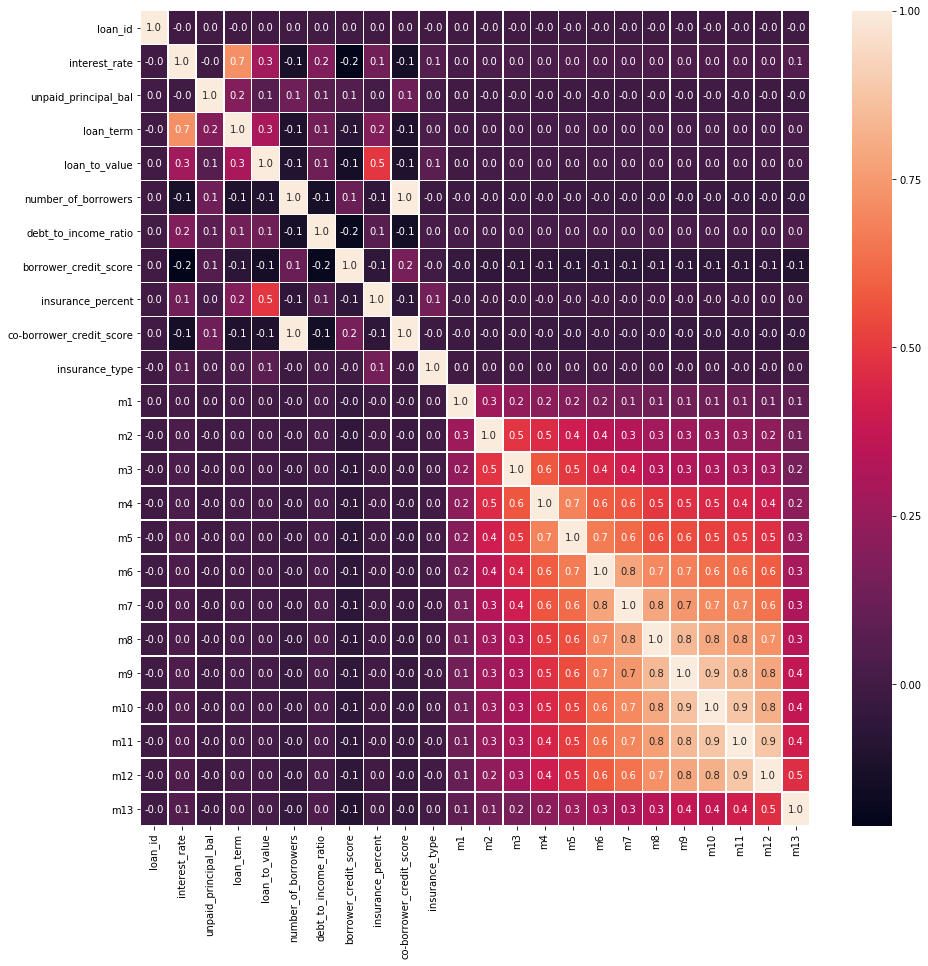

In [9]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
print('column', 'Number of unique values')
for column in df.columns:
    print(column, df[column].nunique())

column Number of unique values
loan_id 116058
source 3
financial_institution 19
interest_rate 923
unpaid_principal_bal 646
loan_term 140
origination_date 3
first_payment_date 4
loan_to_value 92
number_of_borrowers 2
debt_to_income_ratio 58
borrower_credit_score 221
loan_purpose 3
insurance_percent 14
co-borrower_credit_score 216
insurance_type 2
m1 4
m2 5
m3 6
m4 7
m5 8
m6 9
m7 10
m8 10
m9 11
m10 12
m11 13
m12 13
m13 2


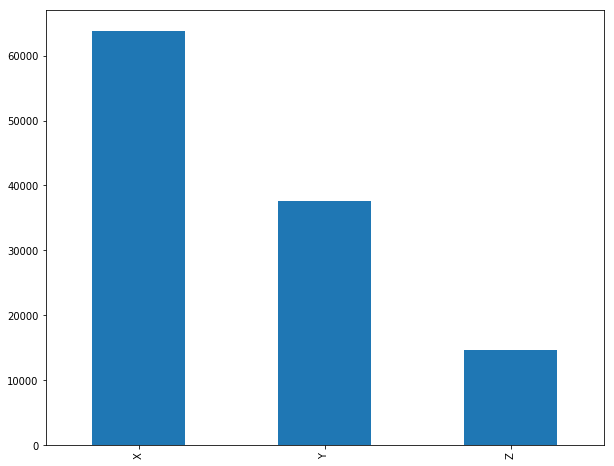

In [11]:
df['source'].value_counts().plot(kind='bar',figsize=(10, 8))

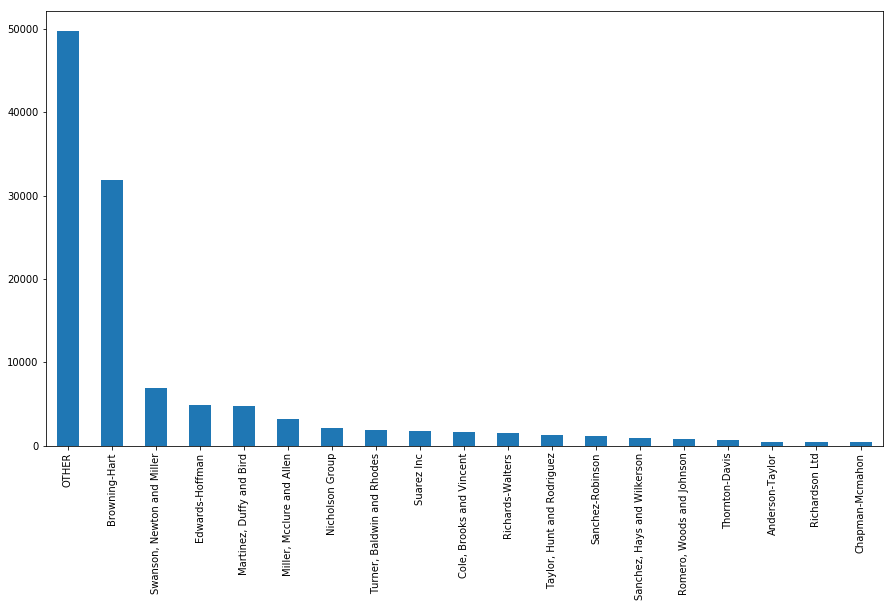

In [12]:
df['financial_institution'].value_counts().plot(kind='bar', figsize=(15, 8))

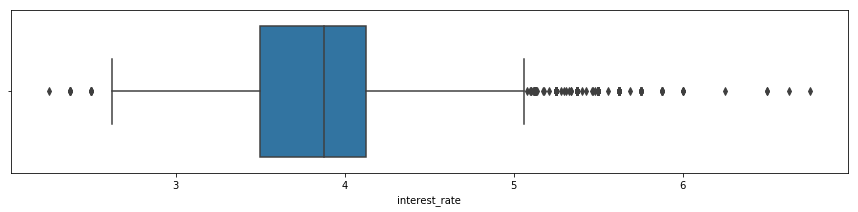

In [13]:
plt.figure(figsize=(15, 3))
sns.boxplot(df["interest_rate"])
plt.show()

In [14]:
y_train = df['m13']
df.drop(columns = 'm13',inplace = True)

In [15]:
def response_time(df):
    diff = []
    for i in range(len(df['origination_date'])):
        temp = int(df['first_payment_date'][i].split('/')[0]) - int(df['origination_date'][i].split('-')[1])
        diff.append(temp)
    df.drop(columns = ['origination_date','first_payment_date'],inplace = True)
    df['response_time'] = diff
    return df

In [16]:
df = response_time(df)
df = pd.get_dummies(df,['source','financial_institution','loan_purpose'],['source','fi','lp'])

In [17]:
smt = SMOTE()
X, y = smt.fit_sample(df, y_train)
X = pd.DataFrame(X)


In [18]:
model = XGBClassifier(learning_rate = 0.055,n_estimators=112, max_depth = 9)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_whole = sc.transform(X.copy())

model.fit(X_train,y_train)
xgb_predict = model.predict(X_test)
    
print( "Train Accuracy :: ", accuracy_score(y_train, model.predict(X_train)))
print( "Test Accuracy  :: ", accuracy_score(y_test, xgb_predict))

Train Accuracy ::  0.9984982643401316
Test Accuracy  ::  0.9981979172081579


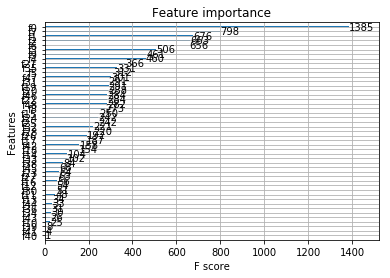

In [19]:
plot_importance(model)
# plt.figure(figsize=(20, 20))
# plt.show()

In [20]:

print(classification_report(y_test,xgb_predict))
print(f1_score(y_test,xgb_predict))
print(roc_auc_score(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28902
           1       1.00      1.00      1.00     28809

    accuracy                           1.00     57711
   macro avg       1.00      1.00      1.00     57711
weighted avg       1.00      1.00      1.00     57711

0.9981931269328329
0.9981962371298679


In [21]:
submission_x = pd.read_csv("../input/india-ml-hiring-av/test.csv")

In [22]:
months = {"Feb":2,"Mar":3,"Apr":4,"May":5}
diff2 = []
for i in range(len(submission_x['origination_date'])):
    temp = months[submission_x['first_payment_date'][i].split('-')[0]] - int(submission_x['origination_date'][i].split('/')[1])
    diff2.append(temp)
submission_x.drop(columns = ['origination_date','first_payment_date'],inplace = True)
submission_x['response_time'] = diff2

In [23]:
submission_x = pd.get_dummies(submission_x,['source','financial_institution','loan_purpose'],['source','fi','lp'])

In [24]:
submission_ids = submission_x['loan_id']

In [25]:
submission_x = sc.transform(submission_x.copy().values)

In [26]:
submission_y = model.predict(submission_x)

In [27]:
submission = pd.DataFrame(submission_ids)
submission['m13'] = submission_y
submission.to_csv("mysubmission.csv",index = False)